# csv 파일 불러오기, DataFrame 생성

파일명: 제품명_modeling.csv 데이터 불러오기
* csv 파일은 작업 상태인 리뷰 중 카테고리가 빈 것은 제거 후 가져온다.

In [1]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re # 정규표현식을 사용할 수 있는 내장 모듈

#청소기
#df = pd.read_csv("/content/drive/MyDrive/lg_modeling/cleaner_modeling.csv", sep=",")

#냉장고
df = pd.read_csv("/content/drive/MyDrive/lg_modeling/refrigerator_modeling.csv", sep=",")

#식세기
#df = pd.read_csv("/content/drive/MyDrive/lg_modeling/dishwasher_modeling.csv", sep=",")

# 리뷰 전처리

### 리뷰 개수 확인

In [3]:
print(df.shape)
df.head()

(9865, 3)


,리뷰 번호,리뷰 원문,카테고리
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,디자인and디자인
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,동작편리성
2,72319,편하고 크고 깨끗하고 좋아요,공간효율성
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,공간효율성and디자인
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,공간효율성


### Dataframe(df) 열 이름 변경

In [4]:
df.columns = ['Review_Num', 'Original_Comment', 'Category']
df

,Review_Num,Original_Comment,Category
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,디자인and디자인
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,동작편리성
2,72319,편하고 크고 깨끗하고 좋아요,공간효율성
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,공간효율성and디자인
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,공간효율성
...,...,...,...
9860,117655,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,디자인
9861,117671,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,디자인and디자인
9862,117674,디자인 성능 모두 괜찮습니다추천해요,디자인
9863,117690,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,디자인


### 불필요한 문자열 제거 (리뷰 원문 전처리)

In [5]:
# html태그 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'<[^>]*>', repl=r'', regex=True)

# email 주소 제거
df['Original_Comment']=df['Original_Comment'].str.replace(pat=r'(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)', 
                                             repl=r'', regex=True)

# _제거
df['Original_Comment']=df['Original_Comment'].str.replace('_', '')

# \r, \n 제거
df['Original_Comment']=df['Original_Comment'].str.replace(pat=r'[\r|\n]', repl=r'', regex=True)

# url 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',repl=r'', regex=True)

# 자음, 모음 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'([ㄱ-ㅎㅏ-ㅣ]+)', repl=r'', regex=True)

# 특수 기호 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace('1n', '')
df['Original_Comment'] = df['Original_Comment'].str.replace('_', '')

# 모두 영어인 행 공백으로 대체
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'^[a-zA-Z\s]+$', repl=r'', regex=True)

# 모두 숫자인 행 공백으로 대체
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'^[0-9\s]+$', repl=r'', regex=True)

# 좌우 공백 제거
df['Original_Comment']= df['Original_Comment'].str.strip()

# 아이디 관련 단어 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id\s', repl=r'', regex=True)

# 주문번호 관련 단어 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문\s번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제\s번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매\s번호\s', repl=r'', regex=True)

In [6]:
df.head(10)

,Review_Num,Original_Comment,Category
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,디자인and디자인
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,동작편리성
2,72319,편하고 크고 깨끗하고 좋아요,공간효율성
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,공간효율성and디자인
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,공간효율성
5,72324,칸칸이 서랍식이라 재료를 잘 분리해서 냉동할수있고 확인 하기가 좋습니다자리도 많이 ...,공간효율성and디자인and디자인
6,72333,배달예상 시간이 많이 갈릴줄 알았는데 정확히 7일 걸렸네요 출근중이라 아들만 있었는...,소음and소음and시인성가독성and디자인and디자인and디자인and디자인and조작편리성
7,72348,좋습니다4도어최고,공간효율성
8,72349,동생네 집에도 쓰고 있어서 보고 구입했습니다 좋습니다 많이 들어가고,공간효율성
9,72353,좋네요 가격도 좋고용량도 넓직하니 사무실이나 원룸용으로 딱,공간효율성


### Category 리스트로 변경

In [7]:
df.insert(3, 'Split_Category', df.Category.str.split('and')) # Category에서 and 제거 후 리스트화
df

,Review_Num,Original_Comment,Category,Split_Category
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,디자인and디자인,"[디자인, 디자인]"
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,동작편리성,[동작편리성]
2,72319,편하고 크고 깨끗하고 좋아요,공간효율성,[공간효율성]
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,공간효율성and디자인,"[공간효율성, 디자인]"
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,공간효율성,[공간효율성]
...,...,...,...,...
9860,117655,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,디자인,[디자인]
9861,117671,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,디자인and디자인,"[디자인, 디자인]"
9862,117674,디자인 성능 모두 괜찮습니다추천해요,디자인,[디자인]
9863,117690,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,디자인,[디자인]


### Split_Category 각 리스트에서 중복으로 들어가는 카테고리 제거

In [8]:
df_leng=len(df)
df_leng

9865

In [9]:
for i in range(df_leng):
    if len(df.Split_Category[i]) > 1:
            sample1 = df.Split_Category[i]
            sample2 = set(sample1)
            df.Split_Category[i] = list(sample2)
            print(df.Split_Category[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['디자인']
['공간효율성', '디자인']
['공간효율성', '디자인']
['시인성가독성', '디자인', '소음', '조작편리성']
['디자인']
['공간효율성']
['디자인']
['공간효율성', '디자인']
['공간효율성', '기타', '디자인']
['디자인', '소음']
['공간효율성']
['디자인', '소음']
['공간효율성', '디자인']
['디자인']
['디자인']
['공간효율성']
['기타', '동작편리성']
['공간효율성', '디자인']
['기타', '소음']
['기타', '디자인']
['공간효율성']
['디자인', '소음']
['공간효율성', '소음']
['시인성가독성', '공간효율성', '동작편리성']
['공간효율성', '디자인', '소음']
['디자인', '소음']
['기타', '동작편리성', '공간효율성']
['디자인', '조작편리성']
['공간효율성', '디자인']
['공간효율성', '디자인']
['디자인']
['디자인']
['디자인', '소음']
['디자인', '소음']
['공간효율성', '디자인']
['공간효율성']
['디자인', '소음']
['디자인']
['위생', '조작편리성']
['기타', '공간효율성']
['디자인', '소음']
['공간효율성', '디자인']
['공간효율성', '디자인']
['시인성가독성', '소음', '동작편리성']
['디자인', '위생']
['공간효율성', '디자인']
['디자인']
['공간효율성', '디자인']
['디자인', '소음']
['디자인']
['소음']
['사운드', '동작편리성']
['디자인', '소음']
['공간효율성', '디자인']
['공간효율성', '기타']
['공간효율성', '디자인']
['공간효율성', '디자인']
['공간효율성', '디자인']
['디자인', '위생']
['디자인', '소음']
['공간효율성', '디자인']
['공간효율성', '디자인']
['디자인', '소음']
['디자인']
['기타', '디자인']
['디자인', '조작편리성']
['디자인', '소음']
['공간효율성'

In [10]:
df

,Review_Num,Original_Comment,Category,Split_Category
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,디자인and디자인,[디자인]
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,동작편리성,[동작편리성]
2,72319,편하고 크고 깨끗하고 좋아요,공간효율성,[공간효율성]
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,공간효율성and디자인,"[공간효율성, 디자인]"
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,공간효율성,[공간효율성]
...,...,...,...,...
9860,117655,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,디자인,[디자인]
9861,117671,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,디자인and디자인,[디자인]
9862,117674,디자인 성능 모두 괜찮습니다추천해요,디자인,[디자인]
9863,117690,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,디자인,[디자인]


# 새로운 DataFrame 생성 (해당하는 제품군에 맞게 선택)- 해당하는 제품군만 실행

In [11]:
new_df = pd.DataFrame({"original_comment": df['Original_Comment'], "category":df['Split_Category']})

In [ ]:
# #청소기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['그립감']=0
# new_df['청소가능영역']=0
# new_df['무게']=0
# new_df['촉감']=0
# new_df['핸들링']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['흡입력']=0
# new_df['배터리']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [12]:
#냉장고에 해당하는 카테고리를 열에 추가
new_df['소음']=0
new_df['사운드']=0
new_df['위생']=0
new_df['디자인']=0
new_df['조명']=0
new_df['촉감']=0
new_df['동작편리성']=0
new_df['조작편리성']=0
new_df['공간효율성']=0
new_df['조립성']=0
new_df['유지관리']=0
new_df['정보성']=0
new_df['견고성']=0
new_df['안전성']=0
new_df['시인성가독성']=0
new_df['기타']=0

In [ ]:
# #식세기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [13]:
new_df

,original_comment,category,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,[공간효율성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[공간효율성, 디자인]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9861,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9862,디자인 성능 모두 괜찮습니다추천해요,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9863,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 각 리뷰에 해당하는 카테고리의 값을 1로 변경
### ex) [디자인, 동작편리성] -> 디자인 1, 동작편리성 1, 그 외 0

In [14]:
length=len(new_df)

for i in range(length):
    new_df.category[i]
    for l in new_df.category[i]:
        new_df[l][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
new_df

,original_comment,category,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[공간효율성, 디자인]",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9861,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9862,디자인 성능 모두 괜찮습니다추천해요,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9863,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
new_df.drop_duplicates(subset = ['original_comment'], inplace=True) #중복된 행 제거
new_df

,original_comment,category,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[공간효율성, 디자인]",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9861,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9862,디자인 성능 모두 괜찮습니다추천해요,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9863,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
new_df = new_df.drop(columns=['category'])
new_df

,original_comment,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9861,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9862,디자인 성능 모두 괜찮습니다추천해요,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9863,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### 효율적인 코드 실행을 위해 한글로 되있는 열 이름을 영어로 변경

In [18]:
new_df.rename(columns={'소음':'noise'}, inplace=True)
new_df.rename(columns={'사운드':'sound'}, inplace=True)
new_df.rename(columns={'위생':'hygienic'}, inplace=True)
new_df.rename(columns={'디자인':'design'}, inplace=True)
new_df.rename(columns={'조명':'light'}, inplace=True)
new_df.rename(columns={'촉감':'touch'}, inplace=True)
new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
new_df.rename(columns={'공간효율성':'space'}, inplace=True)
new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
new_df.rename(columns={'정보성':'information'}, inplace=True)
new_df.rename(columns={'견고성':'solidity'}, inplace=True)
new_df.rename(columns={'안전성':'safety'}, inplace=True)
new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
new_df.rename(columns={'기타':'etc'}, inplace=True)

new_df

,original_comment,noise,sound,hygienic,design,light,touch,movement,operation,space,ssembly,maintenance,information,solidity,safety,visibility,etc
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,배송은 오래 걸렸지만 기사님께서 친절하게 잘 해주셔 만족합니다성능도 디자인도 맘에 들어요,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9861,냉장고가 항상 부족했는데 사계절 필요한 모드로 쓸수있어서 넘 좋은것 같아요디자인이나...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9862,디자인 성능 모두 괜찮습니다추천해요,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9863,가격대비 좋아요 깔끔하고 기사님도 너무친절하시네요 감사합니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# [NLP] 코랩에 konlpy 설치 후 okt 사용해보기 (이 코드에서는 사용 x -> 혹시 나중에 사용할 수도 있기 때문에 설치방법만 보기)

In [ ]:
# # bash 셸로 명령어 입력하여 라이브러리 설치하기

# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [ ]:
# # JAVA_HOME 환경변수 설정하기

# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# # 형태소
# print("okt.morphs : ", okt.morphs('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 명사
# print("okt.nouns : ", okt.nouns('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 형태소 + 품사
# print("okt.pos : ", okt.pos('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# 토큰화 패키지 customized KoNLPy 사용
# 설명 https://wikidocs.net/44249 참고

In [19]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 4.9 MB/s 
     |████████████████████████████████| 19.4 MB 7.5 MB/s 
     |████████████████████████████████| 453 kB 40.9 MB/s 


### 잘못 토큰화될 가능성이 높은 일부 단어들을, customized KoNLPy를 통해 토큰으로 직접 지정

In [20]:
from ckonlpy.tag import Twitter

twi = Twitter()

words = [('디자인','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 text_token에 저장

In [21]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '에',
             '하다', '을', '이다', '것', '로', '에서', '그', '인', '서', '네요',
             '임', '랑', '게', '요', '에게', '엔']

text_token = []
for sentence in new_df['original_comment']:
    tmp = []
    tmp = twi.morphs(sentence, stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

In [22]:
print(text_token[:3])

[['흰색', '이라', '깨끗', '하고', '예쁘다', '요기', '다린', '보람', '있다', '자다', '쓰다'], ['가격', '만', '빼다', '모든', '괜찮다', '한가지', '아쉽다', '아이스', '메이커', '얼음', '너무', '적다', '반', '자동', '아니', '라는', '0'], ['편', '하고', '크다', '깨끗', '하고', '좋다']]


### 정수 인코딩 - 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들기

In [23]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)

### 아래 결과를 보면단어가 9900개가 넘게 존재. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미.

In [24]:
print(tokenizer.word_index)

{'좋다': 1, '냉장고': 2, '배송': 3, '어요': 4, '하고': 5, '있다': 6, '보다': 7, '설치': 8, '고': 9, '너무': 10, '자다': 11, '디자인': 12, '기사': 13, '들다': 14, '다': 15, '만족': 16, '같다': 17, '친절': 18, '한': 19, '사용': 20, '없다': 21, '해': 22, '되다': 23, '님': 24, '어서': 25, '제품': 26, '크다': 27, '가격': 28, '해서': 29, '해주': 30, '받다': 31, '이쁘다': 32, '끄다': 33, '주문': 34, '문': 35, '오다': 36, '생각': 37, '구매': 38, '맘': 39, '소음': 40, '않다': 41, '더': 42, '지만': 43, '많이': 44, '깔다': 45, '쓰다': 46, '공간': 47, '예쁘다': 48, '감사': 49, '이라': 50, '색상': 51, '넓다': 52, '빠르다': 53, '니': 54, '냉동': 55, '넘다': 56, '안': 57, '실': 58, '나': 59, '마음': 60, 'lg': 61, '라': 62, '스럽다': 63, '네': 64, '아주': 65, '엘지': 66, '용량': 67, '사다': 68, '저렴': 69, '만': 70, '좀': 71, '정말': 72, '수납': 73, '되어다': 74, '히': 75, '해주시': 76, '까지': 77, '분': 78, '냉장': 79, '절하': 80, '화이트': 81, '고장': 82, '친': 83, '님들': 84, '잘': 85, '하': 86, '성능': 87, '고급': 88, '기능': 89, '형': 90, '집': 91, '전': 92, '작다': 93, '때': 94, '가다': 95, '날짜': 96, '깔끔하다': 97, '도어': 98, '거': 99, '다가': 100, '구입': 101, '얼음': 102, 

### 빈도수가 낮은 단어들은 자연어 처리에서 배제. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

### 아래 코드 결과: 등장 빈도가 threshold 값인 2회 미만. 즉, 1회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.30%밖에 되지 않습니다. 아무래도 등장 빈도가 1회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 함. 그래서 이 단어들은 정수 인코딩 과정에서 배제시킴

In [25]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9921
등장 빈도가 1번 이하인 희귀 단어의 수: 4014
단어 집합에서 희귀 단어의 비율: 40.459631085576056
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3051111978150605


### 등장 빈도수가 1이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한

In [26]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5908


### 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환

In [27]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(text_token)

X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

리뷰의 최대 길이 : 377
리뷰의 평균 길이 : 30.773114355231144


In [28]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 120
below_threshold_len(max_len, X)
#문장 길이가 120로 할 경우, 약 97%의 대부분의 샘플을 커버 가능

전체 샘플 중 길이가 120 이하인 샘플의 비율: 97.41484184914842


### 각 리뷰 샘플들에 대해 패딩을 진행

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
X

array([[   0,    0,    0, ...,    6,   11,   46],
       [   0,    0,    0, ...,  198,  612, 1543],
       [   0,    0,    0, ...,  480,    5,    1],
       ...,
       [   0,    0,    0, ...,  149,  176,   22],
       [   0,    0,    0, ...,   10,   18,   49],
       [   0,    0,    0, ...,  976,  664,   17]], dtype=int32)

### 16개 카테고리이기 때문에 y에는 16개의 label이 들어가도록 설정

In [30]:
import numpy as np
y = np.array(new_df.iloc[:, 1:17])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

### 모델링을 위해 train, test set 분리

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(len(X_train))
print(len(X_test))

7891
1973


# 모델링 - GRU를 이용한 Multi-label 아키텍처를 이용하여 모델링을 진행

In [32]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [33]:
label_names = new_df.columns[1:17] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'noise': array([0, 0, 0, ..., 0, 0, 0]),
 'sound': array([0, 0, 0, ..., 0, 0, 0]),
 'hygienic': array([0, 0, 0, ..., 0, 0, 0]),
 'design': array([1, 1, 0, ..., 1, 1, 1]),
 'light': array([0, 0, 0, ..., 0, 0, 0]),
 'touch': array([0, 0, 0, ..., 0, 0, 0]),
 'movement': array([0, 0, 1, ..., 0, 0, 0]),
 'operation': array([0, 0, 0, ..., 0, 0, 0]),
 'space': array([0, 0, 0, ..., 1, 0, 0]),
 'ssembly': array([0, 0, 0, ..., 0, 0, 0]),
 'maintenance': array([0, 0, 0, ..., 0, 0, 0]),
 'information': array([0, 0, 0, ..., 0, 0, 0]),
 'solidity': array([1, 0, 0, ..., 0, 0, 0]),
 'safety': array([0, 0, 0, ..., 0, 0, 0]),
 'visibility': array([0, 0, 0, ..., 0, 0, 0]),
 'etc': array([0, 0, 0, ..., 0, 0, 0])}

In [34]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])

    return model


model = SimpleGRU()

In [36]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
119/119 [==============================] - 66s 382ms/step - loss: 3.1201 - noise_loss: 0.5182 - sound_loss: 0.0494 - hygienic_loss: 0.1026 - design_loss: 0.6688 - light_loss: 0.0835 - touch_loss: 0.0542 - movement_loss: 0.3019 - operation_loss: 0.0817 - space_loss: 0.5485 - ssembly_loss: 0.0576 - maintenance_loss: 0.1193 - information_loss: 0.0456 - solidity_loss: 0.1809 - safety_loss: 0.0636 - visibility_loss: 0.0892 - etc_loss: 0.1550 - noise_F1score: 0.0670 - sound_F1score: 0.0000e+00 - hygienic_F1score: 0.0047 - design_F1score: 0.7343 - light_F1score: 0.0000e+00 - touch_F1score: 0.0000e+00 - movement_F1score: 0.0034 - operation_F1score: 0.0000e+00 - space_F1score: 0.0482 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 4.6685e-04 - information_F1score: 0.0000e+00 - solidity_F1score: 9.0847e-04 - safety_F1score: 4.2017e-04 - visibility_F1score: 0.0000e+00 - etc_F1score: 0.0013 - val_loss: 2.3614 - val_noise_loss: 0.4422 - val_sound_loss: 0.0362 - val_hygienic_loss: 0.

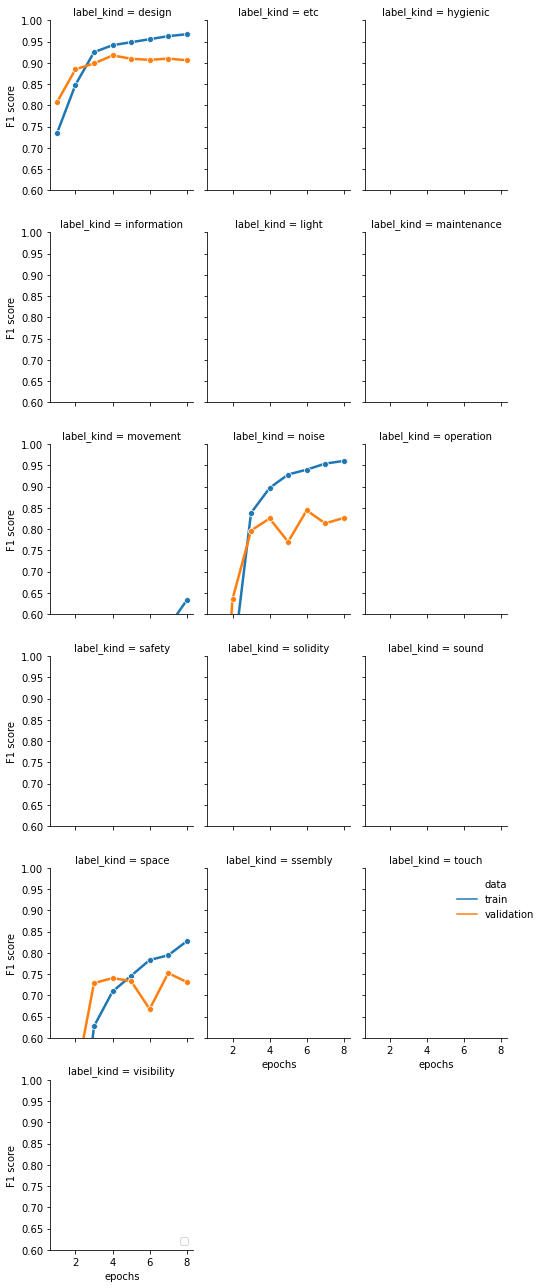

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3])
    fig.set(ylim=(0.6, 1), ylabel='F1 score')

plotDF(history, n_label)

In [38]:
best_model = load_model('best_model.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

33/33 [==============================] - 6s 91ms/step - loss: 1.3217 - noise_loss: 0.1296 - sound_loss: 0.0011 - hygienic_loss: 0.0487 - design_loss: 0.2156 - light_loss: 0.0382 - touch_loss: 0.0083 - movement_loss: 0.1764 - operation_loss: 0.0398 - space_loss: 0.2788 - ssembly_loss: 0.0173 - maintenance_loss: 0.0737 - information_loss: 0.0088 - solidity_loss: 0.1171 - safety_loss: 0.0137 - visibility_loss: 0.0469 - etc_loss: 0.1078 - noise_F1score: 0.8854 - sound_F1score: 0.0000e+00 - hygienic_F1score: 0.0000e+00 - design_F1score: 0.9402 - light_F1score: 0.0000e+00 - touch_F1score: 0.0000e+00 - movement_F1score: 0.1878 - operation_F1score: 0.0000e+00 - space_F1score: 0.7294 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 0.0000e+00 - information_F1score: 0.0000e+00 - solidity_F1score: 0.0152 - safety_F1score: 0.0000e+00 - visibility_F1score: 0.0000e+00 - etc_F1score: 0.0000e+00


[1.321736454963684,
 0.12961450219154358,
 0.00110201770439744,
 0.04867984354496002,
 0.21560516953468323,
 0.03816497325897217,
 0.008345085196197033,
 0.17640690505504608,
 0.03976919502019882,
 0.27875274419784546,
 0.01733214780688286,
 0.07369279861450195,
 0.00880584865808487,
 0.11706724017858505,
 0.013716508634388447,
 0.046859659254550934,
 0.1078222393989563,
 0.8853842616081238,
 0.0,
 0.0,
 0.9401620626449585,
 0.0,
 0.0,
 0.18775112926959991,
 0.0,
 0.7294437885284424,
 0.0,
 0.0,
 0.0,
 0.01515151560306549,
 0.0,
 0.0,
 0.0]

In [39]:
import matplotlib.pyplot as plt
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.tick_params(axis='both', which='major', labelsize=10)

def predict_review(sentence, max_len=120):
    #Preprocess, Predict
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."

    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [tokenizer.word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.

    #Visualize
    fig, ax = plt.subplots(1,1, figsize=(12,9))

    x, y = label_names[::-1], scores[::-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax.barh(x, y, color=colors, height=0.5)
    ax.set_title("Category")
    ax.set_xlim(0,1)
    for i in range(16):
        ax.text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax)

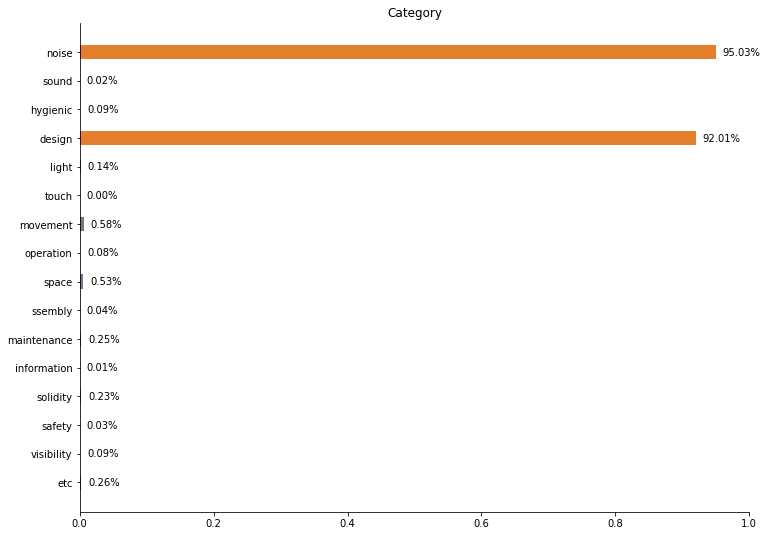

In [40]:
text = "디자인도 맘에들어요 소음도 작고 잘산것같아요"
predict_review(text)

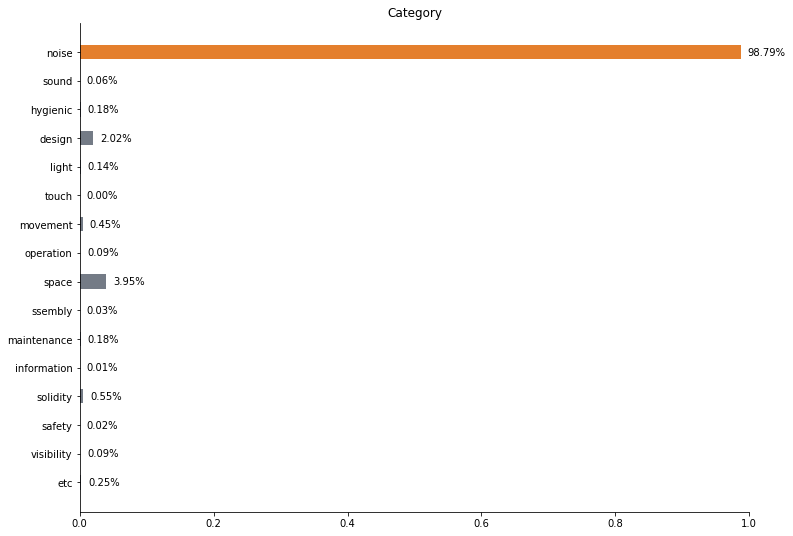

In [41]:
text = "소음이 커서 너무 별로예요"
predict_review(text)

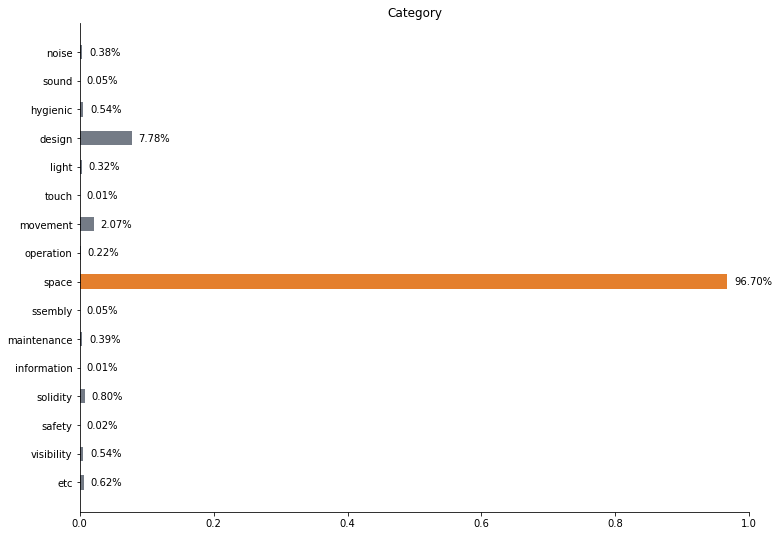

In [42]:
text = "공간 내부도 효율이 떨어지고 너무 시끄럽지만 예뻐요"
predict_review(text)

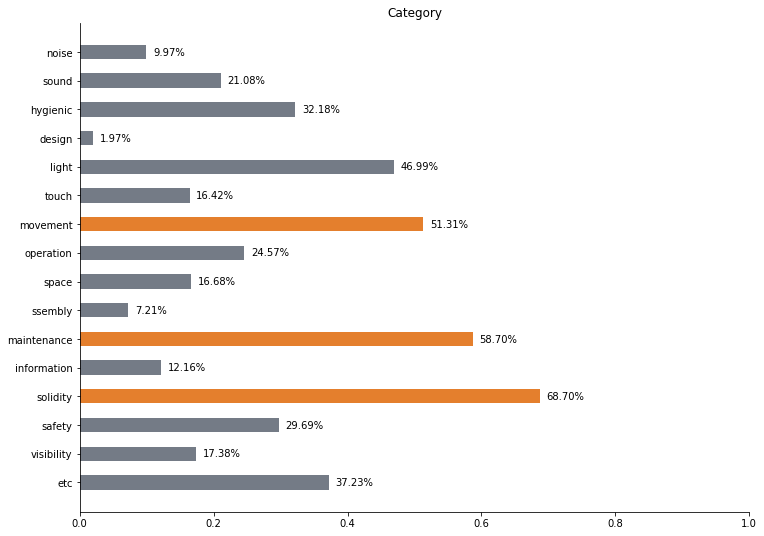

In [43]:
text = "조명이 어두워요"
predict_review(text)

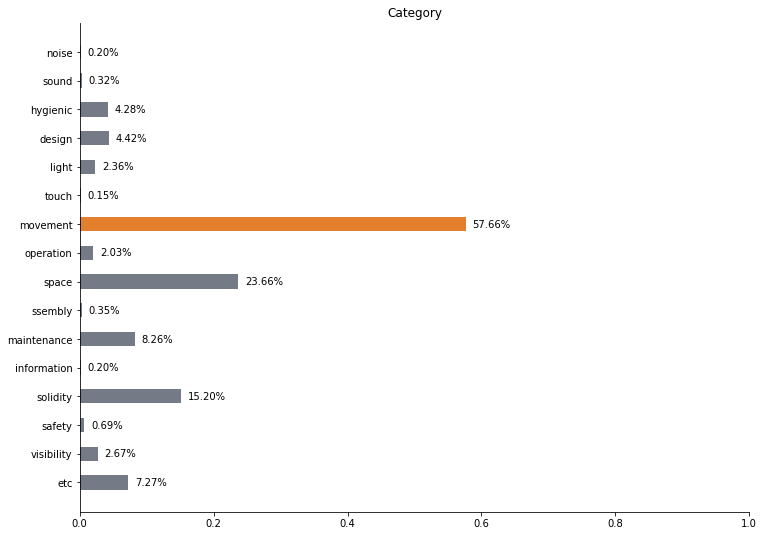

In [44]:
text = "냉장고문 열고 닫는게 편리해요"
predict_review(text)

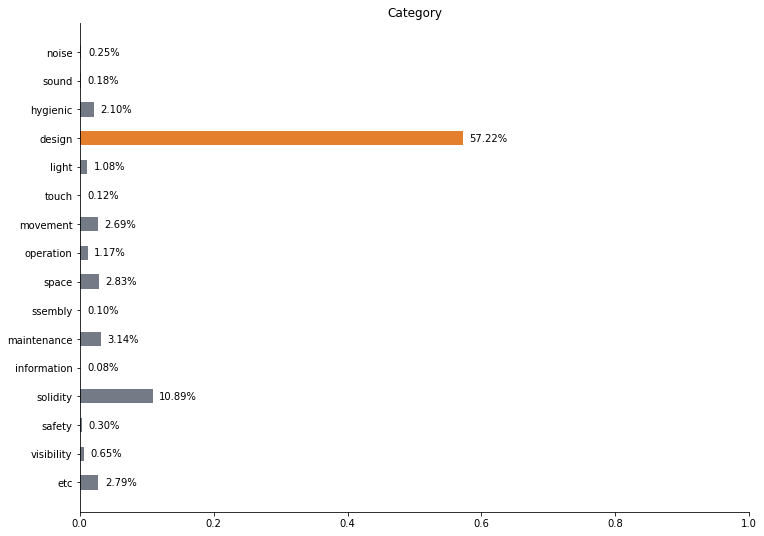

In [45]:
text = "냉장고가 튼튼해서 고장안날것같아요"
predict_review(text)

결론: workstatus 보면 데이터 순서가 디자인 7946 > 공간효율성 2613 > 소음 2097 > 동작편리성 920 > 견고성 362 ... 순이다.
견고성까지는 대략적으로라도 나오는데 나머지 데이터가 많이 없는 카테고리들은 정확도 및 테스트에서도 아주 안좋은 결과를 가져온다. -> 데이터 증강 필요